In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif
import seaborn as sns

ds= pd.read_csv('lung_cancer_updated.csv')


In [2]:
X= ds.iloc[:, 0: 24]
y= ds.iloc[:, 24]

#categorical data
#low-> 1
#high-> 0

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y = encoder.fit_transform(y)

<AxesSubplot:xlabel='Score', ylabel='Feature'>

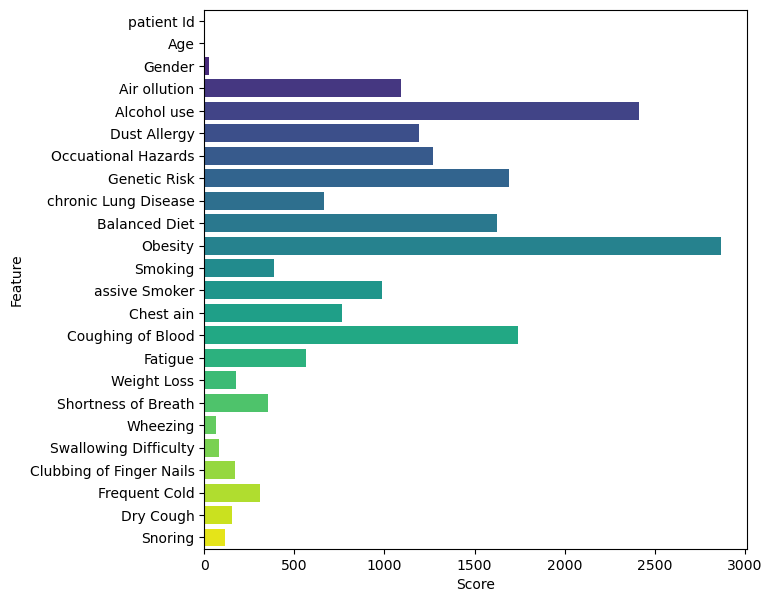

In [3]:
# feature extraction


X = ds.drop('Level', axis = 1)

Y = ds['Level']
bestfeatures = SelectKBest(score_func=f_classif, k='all')
fit = bestfeatures.fit(X,Y)

dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Feature','Score']  #naming the dataframe columns

#Visualize the feature scores
fig, ax=plt.subplots(figsize=(7,7))
plot=sns.barplot(data=featureScores, x='Score', y='Feature', palette='viridis',linewidth=0.5, saturation=2, orient='h')

plot


In [4]:
#Selection method
selection=featureScores[featureScores['Score']>=500]
selection=list(selection['Feature'])
selection.append('Level')
#Adding the Level string to be used to make new data frame
new_cancer=ds[selection]
#New dataframe with selected features
new_cancer.head()
#Lets take a look at the first 5

,Air ollution,Alcohol use,Dust Allergy,Occuational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,assive Smoker,Chest ain,Coughing of Blood,Fatigue,Level
0,2,4,5,4,3,2,2,4,2,2,4,3,Low
1,3,1,4,3,2,3,4,3,4,3,1,3,Low
2,6,7,7,7,7,6,7,7,8,7,7,5,High
3,6,8,7,7,7,6,7,7,8,7,7,9,High
4,3,1,4,2,3,2,3,3,2,4,2,2,Low


In [5]:
#missing values
#not needed here but still written to remember technique

#from sklearn.impute import SimpleImputer
#imputer = SimpleImputer(missing_values= np.nan, strategy= 'mean')
#imputer = imputer.fit(X[: , 1:3])
#X[:, 1:3] = imputer.transform(X[: , 1:3])


In [6]:
# splitting train and test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(new_cancer.drop(['Level'], axis=1), new_cancer['Level'], test_size=0.2, random_state=42)


In [7]:
#feature scaling

#from sklearn.preprocessing import StandardScaler
#sc_X= StandardScaler()
#X_train = sc_X.fit_transform(X_train)
#X_test = sc_X.transform(X_test)


In [8]:
#SVM

from sklearn.svm import SVC
classifier1 = SVC(kernel = 'linear', random_state = 42)
classifier1.fit(X_train, y_train)

#prediction the test set result
y_pred = classifier1.predict(X_test)

#confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)

ac = accuracy_score(y_test, y_pred)
ac

1.0

In [9]:
#Logistic Regression
#  fitting logistic Regression on dataset

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

#prediction the test set result
y_pred = classifier.predict(X_test)

#confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)

ac = accuracy_score(y_test, y_pred)
ac

1.0

In [10]:
list1 = [3,1,4,3,2,3,4,3,4,3,1,3]

In [11]:
list1 = np.array(list1)

In [12]:
predx = classifier1.predict([list1])

C:\Users\SANJANA\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [13]:
predx

array(['Low'], dtype=object)

In [14]:
import pickle
pickle.dump(classifier, open('lung_cancer.pkl', 'wb'))
lung_model = pickle.load(open('lung_cancer.pkl', 'rb'))
